In [1]:
import json
import numpy as np
import seaborn as sns
import torch
import matplotlib.pyplot as plt

/home/ghamon/miniconda3/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
expe="imgep_exploration/all_parameters"
for rep in range(10):
    list_pos=[]
    pf=expe+"/repetition_00000"+str(rep)+"/"
    for nb in range(160):
        if(nb<10):
            a=torch.load(pf+"run_000000"+str(nb)+"_data.pickle",map_location=torch.device('cpu'))
        elif(nb<100):
            a=torch.load(pf+"run_00000"+str(nb)+"_data.pickle",map_location=torch.device('cpu'))
        elif(nb<1000):
            a=torch.load(pf+"run_0000"+str(nb)+"_data.pickle",map_location=torch.device('cpu'))
        else:
            a=torch.load(pf+"run_000"+str(nb)+"_data.pickle",map_location=torch.device('cpu'))
        #print(a["reached_goal"])
        list_pos.append(a["reached_goal"].numpy())
    list_pos=np.array(list_pos)
    np.save(pf+"reached_goal.npy",list_pos)

In [3]:
expe="imgep_exploration/all_parameters"
for rep in range(10):
    list_pos=[]
    pf=expe+"/repetition_00000"+str(rep)+"/"
    for nb in range(160):
        if(nb<10):
            a=torch.load(pf+"run_000000"+str(nb)+"_data.pickle",map_location=torch.device('cpu'))
        elif(nb<100):
            a=torch.load(pf+"run_00000"+str(nb)+"_data.pickle",map_location=torch.device('cpu'))
        elif(nb<1000):
            a=torch.load(pf+"run_0000"+str(nb)+"_data.pickle",map_location=torch.device('cpu'))
        else:
            a=torch.load(pf+"run_000"+str(nb)+"_data.pickle",map_location=torch.device('cpu'))
        if(nb>=40):
            list_pos.append(a["target_goal"].numpy())
            #print(a["target_goal"].numpy())
        else:
            list_pos.append(np.array([0.06,0.0,0.25]))
    list_pos=np.array(list_pos)
    np.save(pf+"target_goal.npy",list_pos)

In [4]:
print(sns.color_palette("Set2"))
a=sns.color_palette("Set2")
set_color_a=[]
for i in [0,1,2,3,6,4,7,5]:
    set_color_a.append(a[i])


set_color_b=[]
for i in [0,1,2,3,4,5]:
    set_color_b.append(a[i])


[(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]


IMGEP
moving agents nb= 486
robu nb= 261
0
random
moving agents nb= 30
robu nb= 20
moving agents nb= 387
moving agents nb= 150
robu nb= 31
moving nb= 387


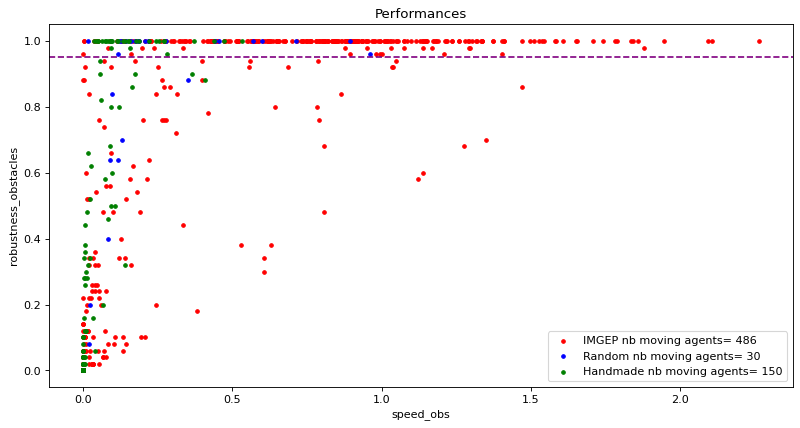

In [5]:
threshold_speed=0
nb_bins=5
bins=np.linspace(-0.3,0.4,nb_bins)
bins=np.array([-0.35,-0.17,-0.05,0.1,0.3])

x="speed_obs"
#x="speed_no_obs"
y="robustness_obstacles"
#y="robustness_moving_obstacles2"
expe=0

#prop because did 30 000 per seed of random search so only look at 39% to have 11 700 per seed
prop=0.39
#prop=1
gl="target"
alpha=1.
dot_size=10
plt.figure(figsize=(12, 6), dpi=80)
ctr=0
speed=[]
robu=[]
with open("creatures_categoriesV2.json", 'r') as f:
      data_crea = json.load(f)
      data_imgep=data_crea["imgep_exploration"]
print("IMGEP")
ctr_moving=0
ctr_robu=0
for i in range(10):

    m=[]

    with open("imgep_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
      data = json.load(f)
    for key in data.keys():
        id=int(key[-3:])


        if(data_imgep[key]["is_moving"] and data_imgep[key]["is_long_term_stable"] and data_imgep[key]["is_soliton"] and data_imgep[key]["is_robust"]):
            ctr_moving+=1
            speed.append(data[key][x])
            robu.append(data[key][y])
            if(data[key]['robustness_obstacles']>0.95):
                ctr_robu+=1
                #print(key,data[key]['speed_obs'])
print("moving agents nb= "+str(ctr_moving))
print("robu nb= "+str(ctr_robu))
#sns.kdeplot(x=speed,y=robu, fill=True,color='red',alpha=0.5)
plt.scatter(speed,robu,color="red",s=dot_size,alpha=alpha,label="IMGEP nb moving agents= "+str(ctr_moving))
#sns.scatterplot(x=speed,y=robu,color='red')
                 

print(ctr)

ctr=0
# Random 
print("random")
speed=[]
robu=[]
with open("creatures_categoriesV2.json", 'r') as f:
      data_crea = json.load(f)
      data_random=data_crea["random_exploration"]
ctr_moving=0
ctr_robu=0
for i in range(10):        
    m_rd_mov=[]
    m_rd=[]

    with open("random_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
      data = json.load(f)
    total=len(data.keys())
    
    ctr=0
    for key in data.keys():
            ctr+=1
            if(ctr>prop*total):
                break
        #if(data[key]['robustness_moving_obstacles1']>0.95):
            if(data_random[key]["is_moving"] and data_random[key]["is_long_term_stable"] and data_random[key]["is_soliton"] and data_random[key]["is_robust"]):
                ctr_moving+=1
                speed.append(data[key][x])
                robu.append(data[key][y])
                if(data[key]['robustness_obstacles']>0.95):
                            ctr_robu+=1
                
                  #if(data[key]['robustness_moving_obstacles1']>0.95):
#sns.kdeplot(x=speed,y=robu, fill=True,color='blue',alpha=0.8,grid_size=1000,levels=100) 
print("moving agents nb= "+str(ctr_moving))
print("robu nb= "+str(ctr_robu))
plt.scatter(speed,robu,color="blue",s=dot_size,alpha=alpha,label="Random nb moving agents= "+str(ctr_moving))
#sns.scatterplot(x=speed,y=robu,color='blue')

speed=[]
robu=[]
ctr_moving=0
with open("creatures_categoriesV2.json", 'r') as f:
      data_crea = json.load(f)
data_random=data_crea["imgep_no_obstacles_exploration"]
for i in [0,1,2,3,4,5,6,7,8,9]:        


    with open("imgep_no_obstacles_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
      data = json.load(f)
    total=len(data.keys())
    
    ctr=0
    for key in data.keys():
            ctr+=1

        #if(data[key]['robustness_moving_obstacles1']>0.95):
            if(data_random[key]["is_moving"] and data_random[key]["is_long_term_stable"] and data_random[key]["is_soliton"] and data_random[key]["is_robust"]):
                ctr_moving+=1
                speed.append(data[key][x])
                robu.append(data[key][y])
                  #if(data[key]['robustness_moving_obstacles1']>0.95):
#sns.kdeplot(x=speed,y=robu, fill=True,color='blue',alpha=0.8,grid_size=1000,levels=100) 
print("moving agents nb= "+str(ctr_moving))

#plt.scatter(speed,robu,color="black",s=dot_size,alpha=alpha,label="Imgep no obs= "+str(ctr_moving))


ctr_moving=0
ctr_robu=0
speed=[]
robu=[]
with open("handmade_exploration/perfs_b.json", 'r') as f:
  data = json.load(f)
with open("creatures_categoriesV2.json", 'r') as f:
  data_crea = json.load(f)
  data_handmade=data_crea["handmade_exploration"]

for key in data.keys():
    #if(data[key]['robustness_moving_obstacles1']>0.95):
        if(data_handmade[key]["is_moving"] and data_handmade[key]["is_long_term_stable"] and data_handmade[key]["is_soliton"] and data_handmade[key]["is_robust"]):
            ctr_moving+=1
            speed.append(data[key][x])
            robu.append(data[key][y])
            if(data[key]['robustness_obstacles']>0.95):
                            ctr_robu+=1
                  #if(data[key]['robustness_moving_obstacles1']>0.95):
#sns.kdeplot(x=speed,y=robu, fill=True,color='green',alpha=0.8,grid_size=1000)   
print("moving agents nb= "+str(ctr_moving))
print("robu nb= "+str(ctr_robu))
plt.scatter(speed,robu,color="green",s=dot_size,alpha=alpha,label="Handmade nb moving agents= "+str(ctr_moving))
#sns.scatterplot(x=speed,y=robu,color='green')


speed=[]
robu=[]
ctr_moving=0
with open("creatures_categoriesV2.json", 'r') as f:
      data_crea = json.load(f)
data_random=data_crea["imgep_no_obstacles_exploration"]
for i in [0,1,2,3,4,5,6,7,8,9]:        


    with open("imgep_no_obstacles_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
      data = json.load(f)
    total=len(data.keys())
    
    ctr=0
    for key in data.keys():
            ctr+=1

        #if(data[key]['robustness_moving_obstacles1']>0.95):
            if(data_random[key]["is_moving"] and data_random[key]["is_long_term_stable"] and data_random[key]["is_soliton"] and data_random[key]["is_robust"]):
                #print(data_random[key].keys())
                ctr_moving+=1
                speed.append(data[key][x])
                robu.append(data[key][y])
                  #if(data[key]['robustness_moving_obstacles1']>0.95):
#sns.kdeplot(x=speed,y=robu, fill=True,color='blue',alpha=0.8,grid_size=1000,levels=100) 
print("moving nb= "+str(ctr_moving))
#plt.scatter(speed,robu,color="black",s=dot_size,alpha=alpha,label="Imgep no obs= "+str(ctr_moving))



plt.legend(prop={'size': 10})
plt.xlabel(x)
plt.ylabel(y)
plt.axhline(y = 0.95, color = 'purple', linestyle = '--')
plt.title("Performances")
plt.savefig("figures/perf.jpg",dpi=300)
plt.show()


        


imgep
0
a
6
13
101
366


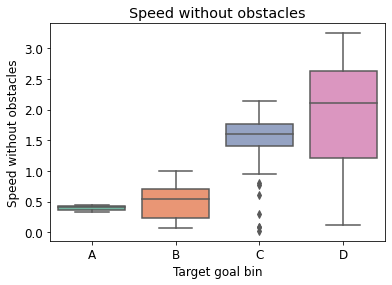

imgep
0
a
6
13
101
366


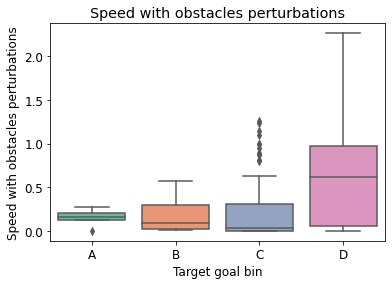

imgep
0
a
6
13
101
366


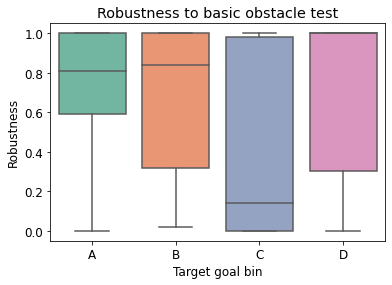

imgep
0
a
6
13
101
366


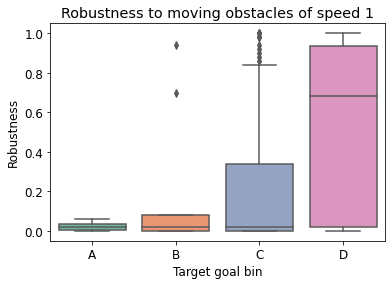

imgep
240
a
6
13
101
366


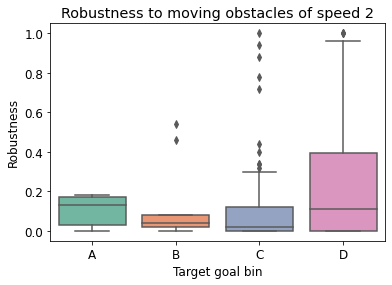

In [7]:
plt.rcParams.update({'font.size': 12})
threshold_speed=0
nb_bins=5
bins=np.linspace(-0.3,0.4,nb_bins)
bins=np.array([-0.5,-0.17,-0.05,0.1,0.5])

expe=0
x="target"

label={'speed_no_obs':'Speed without obstacles','speed_obs':'Speed with obstacles perturbations','robustness_obstacles':'Robustness to basic obstacle test',
      "robustness_moving_obstacles1":"Robustness to moving obstacles of speed 1","robustness_moving_obstacles2":"Robustness to moving obstacles of speed 2"}


for quantity in ['speed_no_obs','speed_obs','robustness_obstacles',"robustness_moving_obstacles1",'robustness_moving_obstacles2']:
    l=[]
    print("imgep")
    ctr=0
    
    with open("creatures_categoriesV2.json", 'r') as f:
      data_crea = json.load(f)
      data_imgep=data_crea["imgep_exploration"]
    for i in range(10):

        b=np.load("imgep_exploration/all_parameters"+"/repetition_00000"+str(i)+"/"+x+"_goal.npy")




    
        for j in range(1,bins.shape[0]):
            m=[]
            if(((-b[:,2]>bins[j-1])*(-b[:,2]<bins[j])).sum()>0):
                with open("imgep_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
                  data = json.load(f)
                for key in data.keys():
                    id=int(key[-3:])
                    if((-b[id,2]>bins[j-1])*(-b[id,2]<bins[j]) ):
                      #if(data[key]['robustness_moving_obstacles1']>0.95):
                      #if(data_imgep[key]["is_moving"]):
                        if(data_imgep[key]["is_moving"] and data_imgep[key]["is_robust"] and data_imgep[key]["is_long_term_stable"] and data_imgep[key]["is_soliton"]):
                            m.append(data[key][quantity])
                            if(quantity=='robustness_moving_obstacles2' and data[key]['robustness_obstacles']>0.9 and data[key]['speed_obs']>0.3):
                                ctr+=1
                            
            else:
                m.append(0)
            if(i>0):
                l[j-1].extend(m)
            else:
                l.append(m)
                
                
    print(ctr)
    
    
    
    
    
   

    #l.append(l[0]+l[1]+l[2]+l[3])
        #plt.plot(c,l,color=colors[i,:3])
    print("a")
    for alz in l:
        print(len(alz))


    lb=[]
    for i in [0,1,2,3]:
        lb.append(l[i])

    ax = sns.boxplot(data=lb,palette=sns.color_palette(set_color_b))
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0:4] = ['A','B','C','D']

    ax.set_xticklabels(labels)
    if(quantity[:4]!='spee'):
        plt.title(label[quantity])
        plt.xlabel("Target goal bin")
        plt.ylabel("Robustness")
        #plt.ylim([-0.2,4.2])
        plt.savefig("figures/perf_"+quantity+".jpg",dpi=300)
        plt.show()
    else:
        plt.title(label[quantity])
        plt.xlabel("Target goal bin")
        plt.ylabel(label[quantity])
        #plt.ylim([-0.2,4.2])
        plt.savefig("figures/perf_"+quantity+".jpg",dpi=300)
        plt.show()

